In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

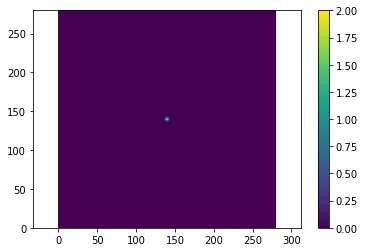

In [2]:
x = np.arange(-70,70,0.5)
y = np.arange(-70,70,0.5)
nx = x.shape[0]
ny = y.shape[0]
x,y = np.meshgrid(x,y,indexing='ij')
h = 0.2*np.ones((nx,ny))
etainit = 2*np.exp(-(x**2+y**2))
plt.pcolormesh(etainit)
plt.axis('equal')
plt.colorbar()
plt.show()

In [3]:
x.max()

69.5

In [4]:
np.savetxt('bathymetry',h)
np.savetxt('initialSurface',etainit)

In [12]:
def exportGRD(outputname,z,ncols,nrows,xll,xur,yll,yur):
    print(ncols,nrows,xll,xur,yll,yur)
    f = open(outputname,'w')
    f.write('DSAA\n')
    f.write('%i %i\n'%(ncols, nrows))
    f.write('%.10f %.10f\n'%(xll,xur))
    f.write('%.10f %.10f\n'%(yll,yur))


    f.write('%.10f %.10f\n'%(z.min(),z.max()))

    s = [' '.join(['%.10f '%num for num in z[-i,:]]) for i in range(z.shape[0])]

    for ss in s:
        f.write('%s\n'%ss)
    f.close()

In [13]:
args = {
    'outputname': 'bathymetry.grd',
    'z': h,
    'ncols': x.shape[1],
    'nrows': x.shape[0],
    'xll': x.min(),
    'xur': x.max(),
    'yll': y.min(),
    'yur': y.max()    
}
exportGRD(**args)

280 280 -70.0 69.5 -70.0 69.5
